In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/home/hrushikesh/Downloads/students_adaptability_level_online_education.csv')

In [3]:
df.shape

(1205, 14)

In [4]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [6]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [7]:
# missing value
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [8]:
# look  describe data set
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


<AxesSubplot:ylabel='Adaptivity Level'>

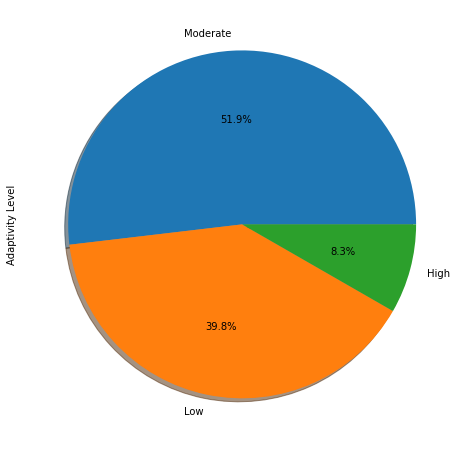

In [9]:
# Show the percentage Adaptivity Level in Dataset
plt.figure(figsize=(12,8))
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<AxesSubplot:ylabel='Gender'>

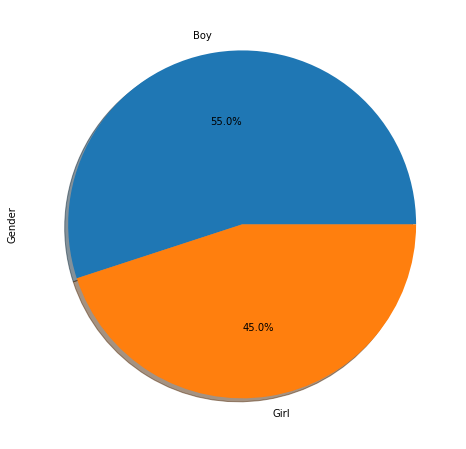

In [10]:
# Show the percentage Gender in Dataset

plt.figure(figsize=(12,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<AxesSubplot:ylabel='Device'>

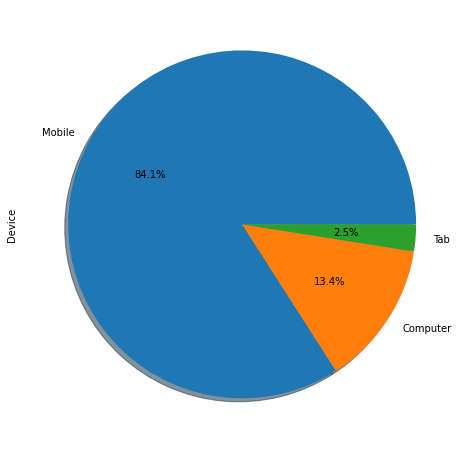

In [11]:
# Show the Device using in Dataset
plt.figure(figsize=(12,8))
df['Device'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

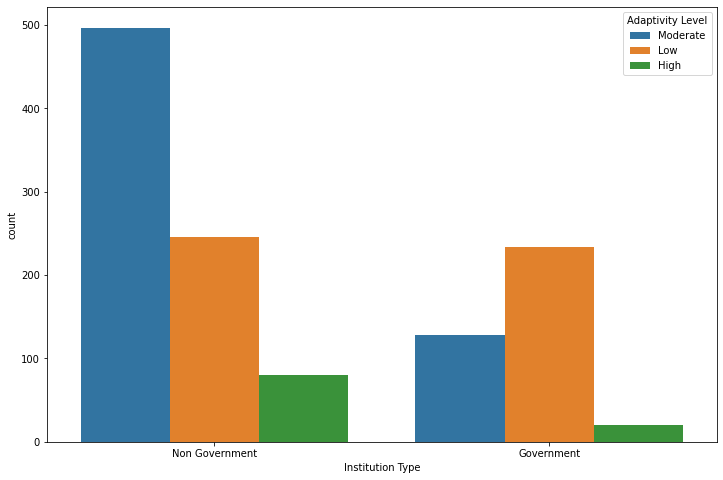

In [12]:
# Show the effect Institution Type in Adaptivity Level using in Dataset

plt.figure(figsize=(12,8))
sns.countplot(df["Institution Type"],hue=df["Adaptivity Level"])

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

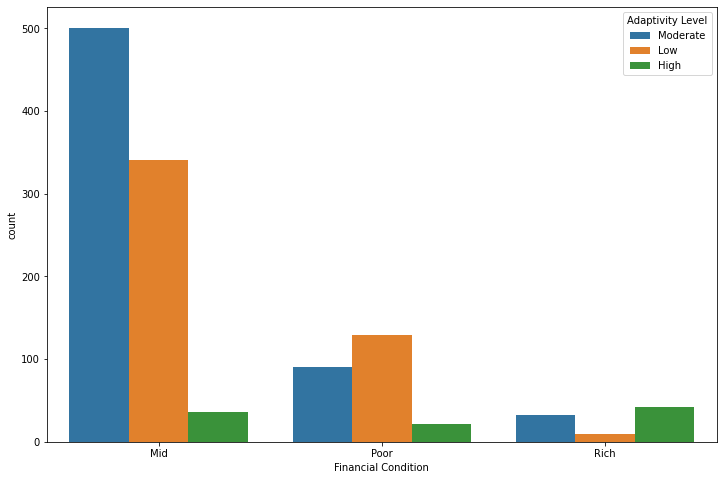

In [13]:
# Show the effect Financial Condition in Adaptivity Level using in Dataset

plt.figure(figsize=(12,8))
sns.countplot(df["Financial Condition"],hue=df["Adaptivity Level"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

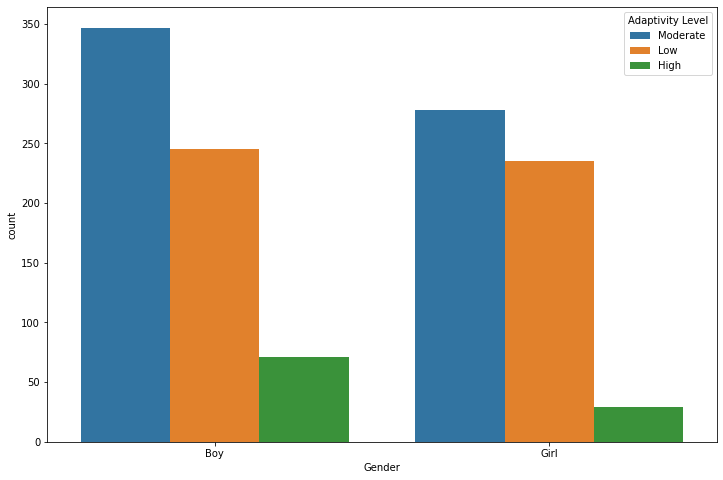

In [14]:
# Show the effect Gender in Adaptivity Level using in Dataset

plt.figure(figsize=(12,8))
sns.countplot(df["Gender"],hue=df["Adaptivity Level"])

<AxesSubplot:xlabel='Network Type', ylabel='count'>

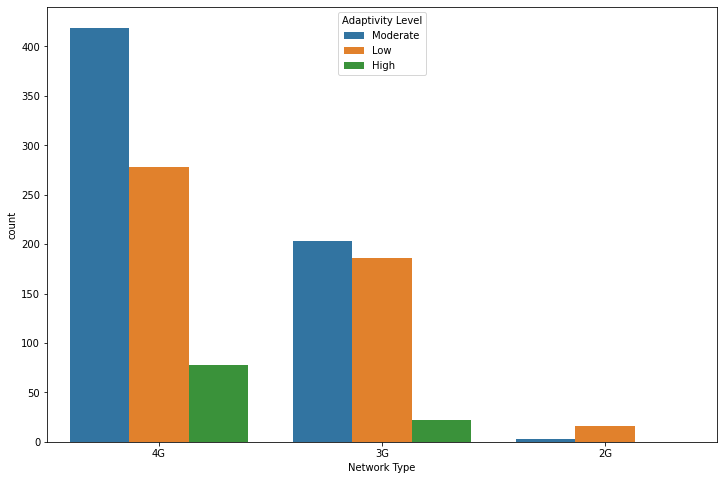

In [15]:
# Show the effect Network Type in Adaptivity Level using in Dataset

plt.figure(figsize=(12,8))
sns.countplot(df["Network Type"],hue=df["Adaptivity Level"])

# Building a Machine Learning Model /Classification Predict

In [16]:
#Importing the basic librarires for building model - classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [17]:
# change all data type using LabelEncode

data=df
label_encoders = {}
categorical_columns = data.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [18]:
#Defined X value and y value , and split the data train
X = data.drop(columns="Adaptivity Level")           
y = data["Adaptivity Level"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (903, 13)
X Test  :  (302, 13)
Y Train :  (903,)
Y Test  :  (302,)


In [19]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVC=SVC()

In [20]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 70.86092715231787
DecisionTreeClassifier() : 90.39735099337747
RandomForestClassifier() : 91.3907284768212
KNeighborsClassifier() : 78.80794701986756
MLPClassifier() : 81.78807947019867
KNeighborsClassifier() : 78.80794701986756
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) : 91.3907284768212
SVC() : 76.82119

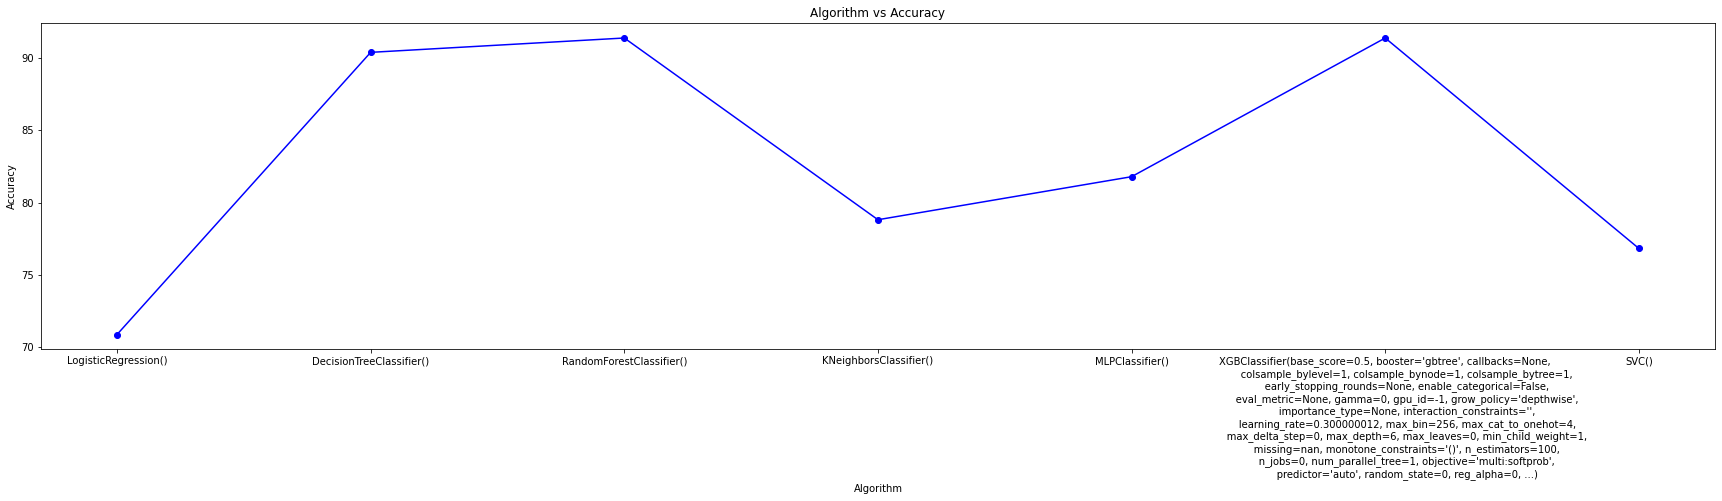

In [21]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='blue')
plt.show()

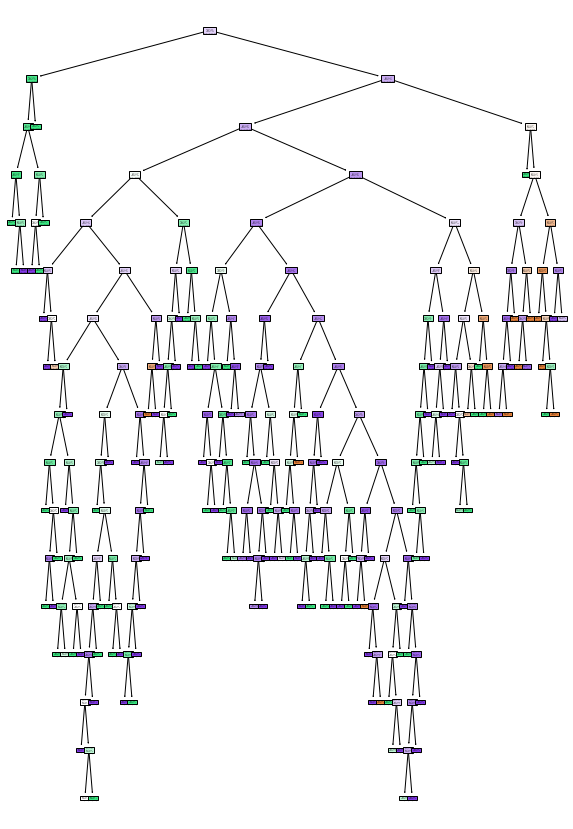

In [22]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(DTR,filled=True)
plt.show()

In [23]:
DTR.feature_importances_

array([0.11055911, 0.10431885, 0.08107598, 0.03712254, 0.04323967,
       0.05969204, 0.0253571 , 0.0636264 , 0.07044593, 0.09107992,
       0.22883445, 0.03810726, 0.04654076])

In [24]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(2,32,1),
'min_samples_leaf' : range(1,10,1),
'min_samples_split': range(2,10,1),
'splitter' : ['best', 'random']
}

In [25]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DTR,param_grid=grid_param,cv=5,n_jobs =2, verbose=1)

In [26]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [27]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [28]:
grid_search.best_score_

0.8970227133210559

In [29]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25,
min_samples_leaf= 1, min_samples_split= 2,
splitter ='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [30]:
ac2_clf= clf.score(X_test ,y_test)
ac2_clf

0.8940397350993378

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree')

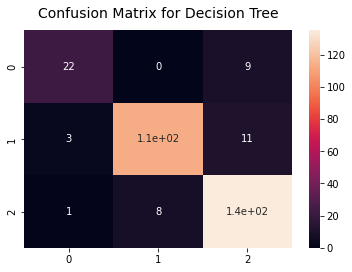

In [31]:
from sklearn.metrics import confusion_matrix
y_pred_clf = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree", fontsize=14,
fontname="DejaVu Sans", y=1.03)

In [32]:
# plt.bar(['Decision Tree','Random Forest'],[ac2_clf,ac_rf])
# plt.xlabel("Algorithms")
# plt.ylabel("Accuracy")
# plt.show()

# Building Model usign TensorFlow

In [33]:
# import TensorFlow
import tensorflow as tf

2022-08-22 16:17:40.851355: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-22 16:17:40.866743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-22 16:17:40.866760: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
# building model and we made split the data - train and test

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = X_train.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation = 'selu',kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation = 'selu' , kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3 , activation = 'softmax')
])
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy , optimizer = tf.keras.optimizers.Nadam() , metrics = ['accuracy'])

2022-08-22 16:17:42.234487: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-22 16:17:42.234520: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-22 16:17:42.234537: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrushikesh-IdeaPad-5-Pro-14ITL6): /proc/driver/nvidia/version does not exist
2022-08-22 16:17:42.235360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
model.fit(X_train , y_train , epochs = 3500 , callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss' ,mode = 'min', patience = 5)])

Epoch 1/3500
29/29 [==============================] - 1s 1ms/step - loss: 1.0842 - accuracy: 0.5293
Epoch 2/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.8444 - accuracy: 0.6556
Epoch 3/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.7511 - accuracy: 0.6944
Epoch 4/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.7231
Epoch 5/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.7176
Epoch 6/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7331
Epoch 7/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7575
Epoch 8/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7564
Epoch 9/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7398
Epoch 10/3500
29/29 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7785

In [36]:
# evaluation model
a , score = model.evaluate(X_test , y_test)
print("The Score TF model :",score)

10/10 [==============================] - 0s 778us/step - loss: 0.3817 - accuracy: 0.8808
The Score TF model : 0.8807947039604187
